In [1]:
import numpy as np
import pandas as pd

import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import timeit

%matplotlib inline

In [2]:
data = pd.read_csv(r"../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,6407-GSJNL,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#checking for any missing values in the dataset
data.isnull().sum().sort_values(ascending=False)

Churn               0
OnlineSecurity      0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
TotalCharges        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
customerID          0
dtype: int64

In [6]:
count_churn = data['Churn'].value_counts()

In [7]:
import plotly_express as px
c_churn = pd.DataFrame(data['Churn'].value_counts().reset_index().values,
                        columns=['Churn', 'count_churn'])

c_churn = c_churn.sort_values('count_churn', ascending=False)
group_by = c_churn.groupby('Churn')['count_churn'].sum().reset_index()
fig = px.bar(group_by.sort_values('Churn', ascending = False)[:20][::-1], x = 'Churn', y = 'count_churn',
            title = 'Total value counts for people that left and people that did not leave', text = 'count_churn', height = 500, orientation = 'v' )
fig.show()

In [8]:
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

dataset = data.copy()

In [9]:
yes_churn = dataset[dataset.Churn=='Yes']
no_churn = dataset[dataset.Churn=='No']

In [10]:
trace1 = go.Histogram(
    x=yes_churn.gender  ,
    opacity=0.75,
    name='churned')

trace2 = go.Histogram(
    x=no_churn.gender  ,
    opacity=0.75,
    name='did not churn')

data = [trace1, trace2]
layout = go.Layout(barmode='stack',
                   title='Churn according to Gender',
                   xaxis=dict(title='Gender'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [11]:
trace1 = go.Histogram(
    x=yes_churn.SeniorCitizen  ,
    opacity=0.75,
    name='churned')

trace2 = go.Histogram(
    x=no_churn.SeniorCitizen  ,
    opacity=0.75,
    name='did not churn')

data = [trace1, trace2]
layout = go.Layout(barmode='stack',
                   title='Churn according to senior citizenship',
                   xaxis=dict(title='Senior Citizen'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [12]:
trace1 = go.Histogram(
    x=yes_churn.tenure,
    opacity=0.75,
    name='churned')

trace2 = go.Histogram(
    x=no_churn.tenure,
    opacity=0.75,
    name='did not churn')

data = [trace1, trace2]
layout = go.Layout(barmode='stack',
                   title='Churn according to tenure',
                   xaxis=dict(title='tenure'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [13]:
trace1 = go.Histogram(
    x=yes_churn.Partner,
    opacity=0.75,
    name='churned')

trace2 = go.Histogram(
    x=no_churn.Partner,
    opacity=0.75,
    name='did not churn')

data = [trace1, trace2]
layout = go.Layout(barmode='stack',
                   title='Churn according to partner',
                   xaxis=dict(title='Partner'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [14]:
trace1 = go.Histogram(
    x=yes_churn.MonthlyCharges,
    opacity=0.75,
    name='churned')

trace2 = go.Histogram(
    x=no_churn.MonthlyCharges, 
    opacity=0.75,
    name='did not churn')

data = [trace1, trace2]
layout = go.Layout(barmode='stack',
                   title='Churn according to Monthly Charges',
                   xaxis=dict(title='Monthly Charges'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [15]:
val_monthcharges = dataset['MonthlyCharges'].values

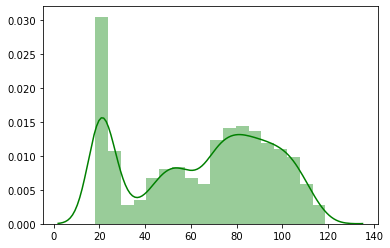

In [16]:
sns.distplot(val_monthcharges, color='g')

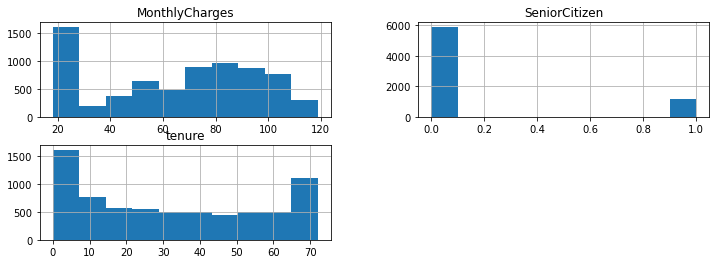

In [17]:
dataset.hist(figsize=(12,4))
plt.show()

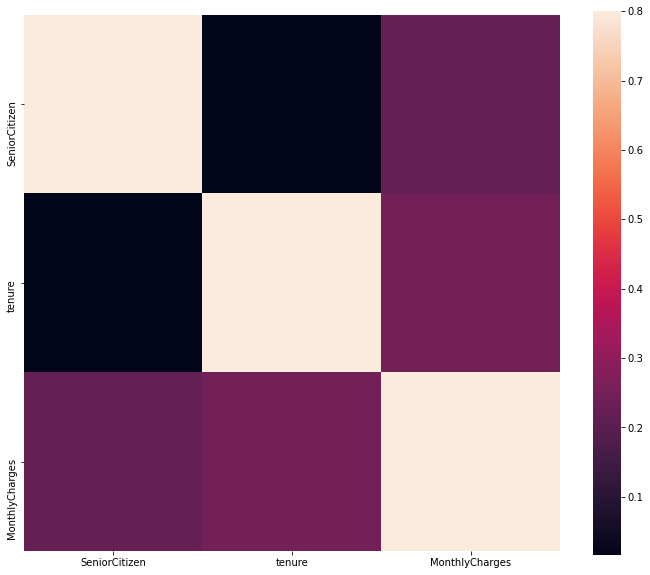

In [18]:
correlation_matrix = dataset.corr()
fig = plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, vmax=0.8, square=True)
plt.show()

In [19]:
y = dataset['Churn']
X = dataset.drop(['Churn'], axis = 1)

In [20]:
X = pd.get_dummies(X, drop_first=True)

In [21]:
y = y.map({'Yes':1, 'No':0})

In [22]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [26]:
training_score = cross_val_score(classifier, X_train, y_train, cv=5)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.7/site-packages/sklearn/lin

In [27]:
training_score

array([0.80390417, 0.81188997, 0.78527063, 0.78083407, 0.80639432])

In [28]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters

In [29]:
log_reg

LogisticRegression(C=0.01)

In [30]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.7/site-packages/sklearn/lin

In [31]:
log_reg_score

array([0.81277728, 0.80212955, 0.79325643, 0.7905945 , 0.81616341])

In [32]:
log_reg_score.mean()

0.8029842348554219

In [33]:
y_pred = log_reg.predict(X_test)

In [34]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
y_test = y_test.reset_index()

In [36]:
y_test = y_test.drop(['index'], axis=1)

In [37]:
y_test.head(5)

,Churn
0,0
1,0
2,0
3,0
4,0


In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(y_pred, y_test)

In [40]:
cm

array([[942, 187],
       [ 99, 181]])

In [41]:
from sklearn.metrics import classification_report

In [42]:
print('Logistic Regression:')
print(classification_report(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1041
           1       0.65      0.49      0.56       368

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [43]:
#If you like this kernel please kindly UPVOTE. THANKS 